## Analyzing the backtest results

In [33]:
import logging
import os
import re
from kiteconnect import KiteConnect
from dotenv import load_dotenv
load_dotenv()
import bs_threading
from matplotlib import pyplot
import importlib
import time
from datetime import datetime, timedelta, timezone
import dateutil
import pandas as pd
importlib.reload(bs_threading)
from bs_threading import bs_threadify, bs_make_throttle_ready_func, bs_multiprocessify,f


In [2]:
# load all the stocks
# we do it together to the final of the sytem skk

INPUT_KITE_HISTORICAL_DIR = "input/kite_historical"
INPUT_KITE_INSTRUMENTS_DIR = "input/kite_instruments"
BACKTEST_DIR = "output/bsstonks_backtest"

In [18]:
for backtest_strategy_dir in os.listdir(BACKTEST_DIR):
    print(backtest_strategy_dir)

all_ma_overlap_5_100
ma_overlap_15_100
ma_overlap_5_100


In [51]:
backtest_strategy_dir = "ma_overlap_5_100"
strategy_symbol_summary = []
for backtest_symbol_file in os.listdir(os.path.join(BACKTEST_DIR,backtest_strategy_dir)):
    print("---------------------")
    print(backtest_symbol_file)
    df = pd.read_csv(os.path.join(BACKTEST_DIR, backtest_strategy_dir, backtest_symbol_file))
    start_balance = df[df['buysell']=='sell'].iloc[0]['balance']
    end_balance = df[df['buysell']=='sell'].iloc[-1]['balance']
    pnl = (end_balance-100000)
    pnl_multiplier = pnl/100000
    print(pnl_multiplier)
    start_date = dateutil.parser.parse(df['date'].iloc[0])
    end_date = dateutil.parser.parse(df['date'].iloc[-1])
    span_days = (end_date-start_date).days
    
    pnl_percentage_multiplier_per_year = (pnl_multiplier-1)*100/span_days*365
    strategy_symbol_summary.append({
        'symbol':backtest_symbol_file,
        'p&l % per  year': pnl_percentage_multiplier_per_year,
        'p&l %':(pnl_multiplier-1)*100,
        'p&l': pnl
    })
#     print("100000", start_balance, end_balance)
#     print("P&L --> ", )


---------------------
256265_NIFTY 50_EQ_INDICES_NSE_day.csv
34.18143738720056
---------------------
257545_NIFTY CONSUMPTION_EQ_INDICES_NSE_day.csv
3.8925132785538716
---------------------
258825_NIFTY50 PR 2X LEV_EQ_INDICES_NSE_day.csv
1.559917858999336
---------------------
259081_NIFTY50 PR 1X INV_EQ_INDICES_NSE_day.csv
0.02898215506261957
---------------------
259337_NIFTY50 TR 2X LEV_EQ_INDICES_NSE_day.csv
1.8061531865828653
---------------------
259593_NIFTY50 TR 1X INV_EQ_INDICES_NSE_day.csv
0.120557702202644
---------------------
259849_NIFTY IT_EQ_INDICES_NSE_day.csv
4.99529395193081
---------------------
260105_NIFTY BANK_EQ_INDICES_NSE_day.csv
12.329704621009224
---------------------
260617_NIFTY 100_EQ_INDICES_NSE_day.csv
4.384250440912908
---------------------
260873_NIFTY MIDCAP 50_EQ_INDICES_NSE_day.csv
2.7833090857590195
---------------------
261129_NIFTY REALTY_EQ_INDICES_NSE_day.csv
9.85924972623292
---------------------
262153_NIFTY MNC_EQ_INDICES_NSE_day.csv
1.9548

In [53]:
print("Strategy:", backtest_strategy_dir)
df_symbol_summary = pd.DataFrame(strategy_symbol_summary)
df_symbol_summary

Strategy: ma_overlap_5_100


,symbol,p&l % per year,p&l %,p&l
0,256265_NIFTY 50_EQ_INDICES_NSE_day.csv,136.433757,3318.143739,3.418144e+06
1,257545_NIFTY CONSUMPTION_EQ_INDICES_NSE_day.csv,19.609349,289.251328,3.892513e+05
2,258825_NIFTY50 PR 2X LEV_EQ_INDICES_NSE_day.csv,9.635550,55.991786,1.559918e+05
3,259081_NIFTY50 PR 1X INV_EQ_INDICES_NSE_day.csv,-18.147543,-97.101784,2.898216e+03
4,259337_NIFTY50 TR 2X LEV_EQ_INDICES_NSE_day.csv,13.932098,80.615319,1.806153e+05
5,259593_NIFTY50 TR 1X INV_EQ_INDICES_NSE_day.csv,-18.125152,-87.944230,1.205577e+04
6,259849_NIFTY IT_EQ_INDICES_NSE_day.csv,28.734626,399.529395,4.995294e+05
7,260105_NIFTY BANK_EQ_INDICES_NSE_day.csv,76.608784,1132.970462,1.232970e+06
8,260617_NIFTY 100_EQ_INDICES_NSE_day.csv,24.407260,338.425044,4.384250e+05
9,260873_NIFTY MIDCAP 50_EQ_INDICES_NSE_day.csv,15.914617,178.330909,2.783309e+05


---------------------
256265_NIFTY 50_EQ_INDICES_NSE_day.csv


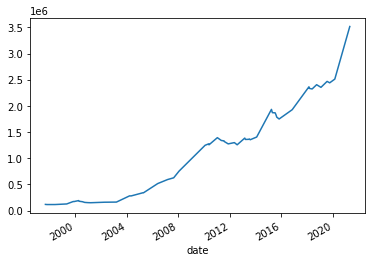

---------------------
257545_NIFTY CONSUMPTION_EQ_INDICES_NSE_day.csv


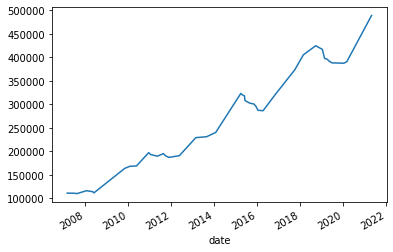

---------------------
258825_NIFTY50 PR 2X LEV_EQ_INDICES_NSE_day.csv


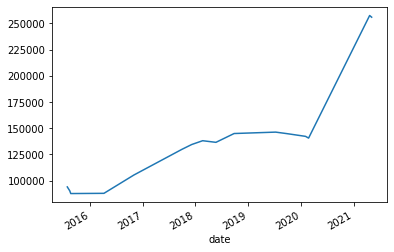

---------------------
259081_NIFTY50 PR 1X INV_EQ_INDICES_NSE_day.csv


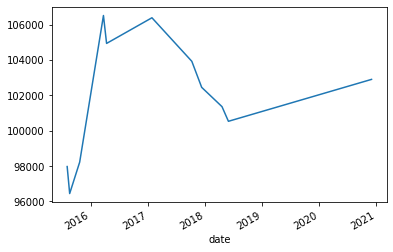

---------------------
259337_NIFTY50 TR 2X LEV_EQ_INDICES_NSE_day.csv


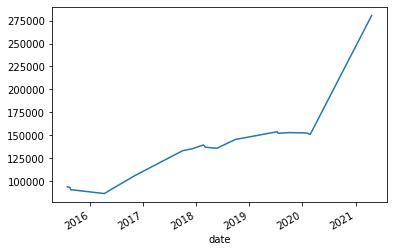

---------------------
259593_NIFTY50 TR 1X INV_EQ_INDICES_NSE_day.csv


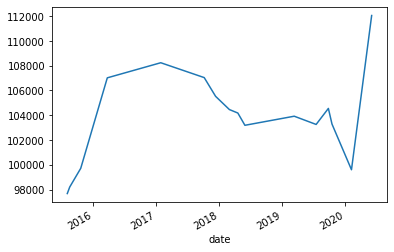

---------------------
259849_NIFTY IT_EQ_INDICES_NSE_day.csv


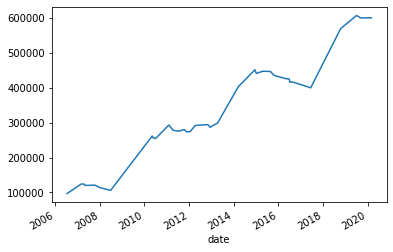

---------------------
260105_NIFTY BANK_EQ_INDICES_NSE_day.csv


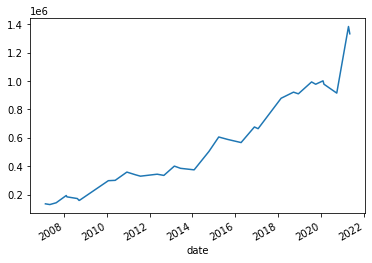

---------------------
260617_NIFTY 100_EQ_INDICES_NSE_day.csv


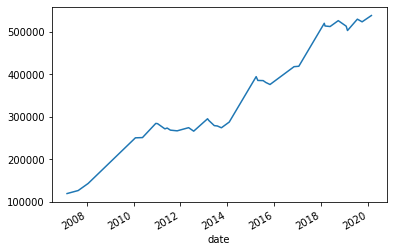

---------------------
260873_NIFTY MIDCAP 50_EQ_INDICES_NSE_day.csv


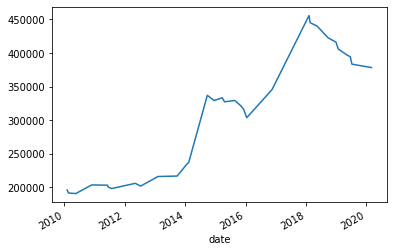

---------------------
261129_NIFTY REALTY_EQ_INDICES_NSE_day.csv


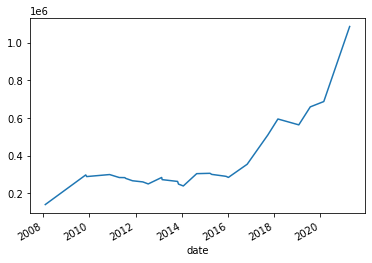

---------------------
262153_NIFTY MNC_EQ_INDICES_NSE_day.csv


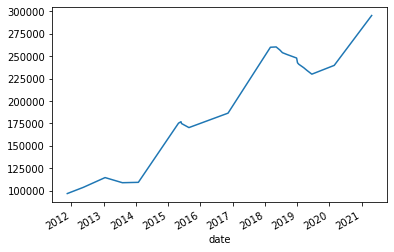

---------------------
262409_NIFTY PHARMA_EQ_INDICES_NSE_day.csv


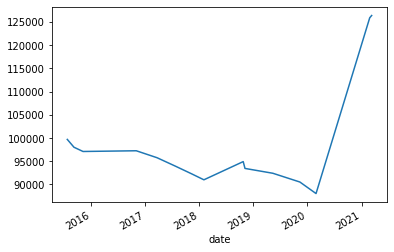

---------------------
262665_NIFTY PSE_EQ_INDICES_NSE_day.csv


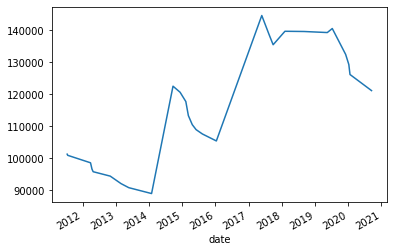

---------------------
263945_NIFTY MEDIA_EQ_INDICES_NSE_day.csv


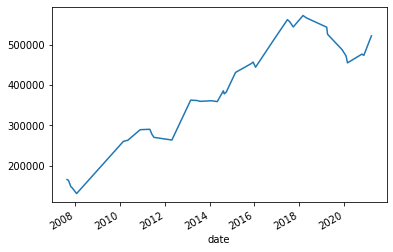

---------------------
265225_NIFTY50 DIV POINT_EQ_INDICES_NSE_day.csv


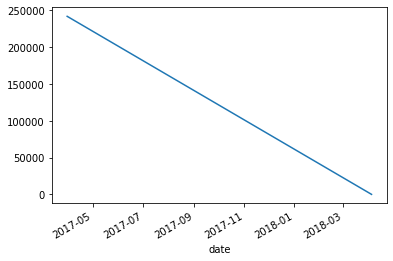

---------------------
265993_NIFTY ALPHA 50_EQ_INDICES_NSE_day.csv


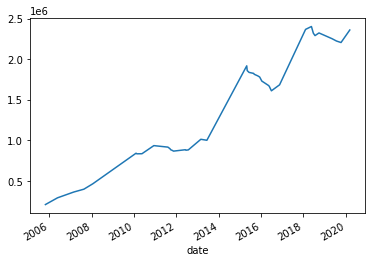

---------------------
266249_NIFTY MIDCAP 150_EQ_INDICES_NSE_day.csv


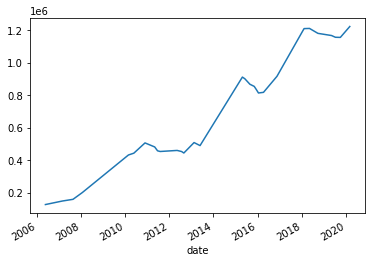

---------------------
266761_NIFTY SMLCAP 50_EQ_INDICES_NSE_day.csv


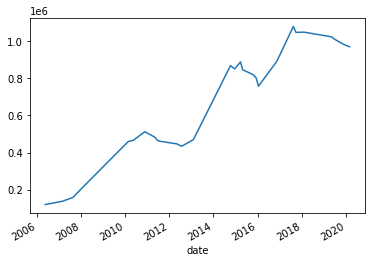

---------------------
267017_NIFTY SMLCAP 100_EQ_INDICES_NSE_day.csv


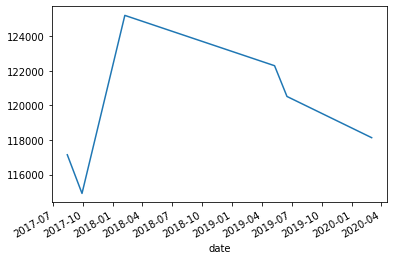

---------------------
267529_NIFTY50 VALUE 20_EQ_INDICES_NSE_day.csv


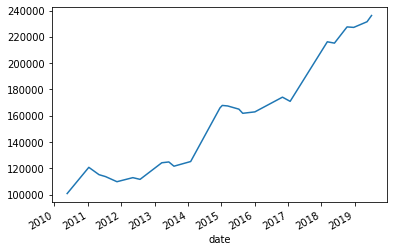

---------------------
267785_NIFTY100 LIQ 15_EQ_INDICES_NSE_day.csv


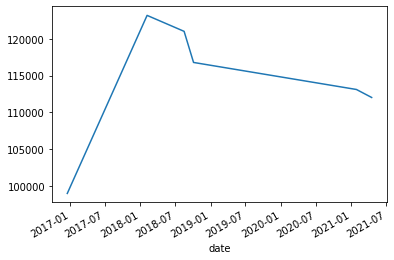

---------------------
268041_NIFTY 500_EQ_INDICES_NSE_day.csv


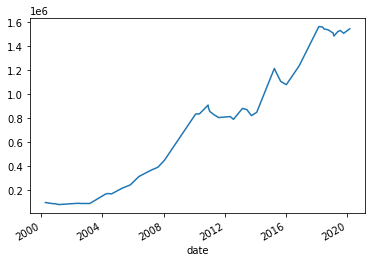

---------------------
269065_NIFTY GS 10YR_EQ_INDICES_NSE_day.csv


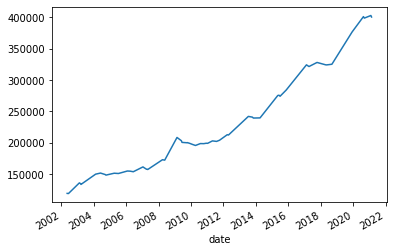

---------------------
270857_NIFTY NEXT 50_EQ_INDICES_NSE_day.csv


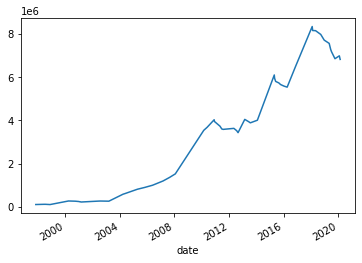

---------------------
271625_NIFTY50 EQL WGT_EQ_INDICES_NSE_day.csv


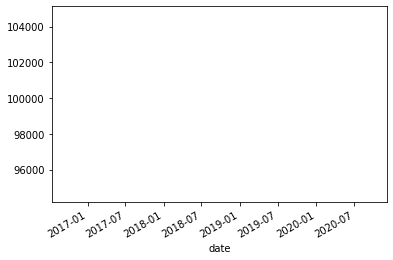

---------------------
272137_NIFTY100 LOWVOL30_EQ_INDICES_NSE_day.csv


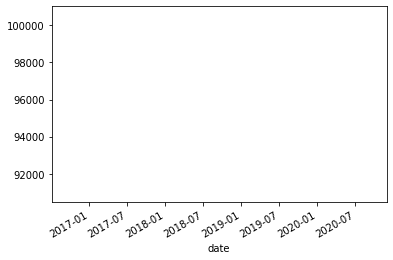

In [41]:
backtest_strategy_dir = "ma_overlap_5_100"
for backtest_symbol_file in os.listdir(os.path.join(BACKTEST_DIR,backtest_strategy_dir)):
    print("---------------------")
    print(backtest_symbol_file)
    df = pd.read_csv(os.path.join(BACKTEST_DIR, backtest_strategy_dir, backtest_symbol_file), index_col="date", parse_dates=True, date_parser=dateutil.parser.parse)
#     df.index_col = 0
#     df.date.astype("datetime")
    df[df['buysell']=='sell']['balance'].plot()
    pyplot.show()